In [1]:
"""
Author: Moustafa Alzantot (malzantot@ucla.edu)
All rights reserved Networked and Embedded Systems Lab (NESL), UCLA.
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""

'\nAuthor: Moustafa Alzantot (malzantot@ucla.edu)\nAll rights reserved Networked and Embedded Systems Lab (NESL), UCLA.\nPermission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN 

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import data_utils
import model_utils
import model

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2
INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [6]:
data = data_utils.load_training_data()

[[1.012817  1.018851  1.023127  ... 0.7548917 0.9279268 0.7980909]
 [1.022833  1.02238   1.021882  ... 0.8043137 0.9129872 0.8192417]
 [1.022028  1.020781  1.019178  ... 0.831714  0.9246597 0.8658821]
 ...
 [1.018445  1.014788  1.021041  ... 0.6956257 0.6753473 0.8980947]
 [1.019372  1.016499  1.022935  ... 0.7479103 0.6603377 0.8283723]
 [1.021171  1.017849  1.022019  ... 0.776768  0.719353  0.8002428]]


## Training the model

In [ ]:
# To get reasonable outputs, should use something bigger than 1000 !
num_epochs = 1000

In [ ]:
model_utils.reset_session_and_model()
with tf.Session() as sess:
    train_config = model.ModelConfig()
    test_config = model.ModelConfig()
    train_config.learning_rate = 0.0003
    train_config.num_layers = 1 
    test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    loader = data_utils.DataLoader(data=data,batch_size=train_config.batch_size, num_steps=train_config.num_steps)
    train_model = model.MDNModel(train_config, True)
    test_model = model.MDNModel(test_config, False)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for idx in range(num_epochs):
        epoch_loss = train_model.train_for_epoch(sess, loader)
        print(idx, ' ', epoch_loss)
        if (idx+1) % 100 == 0:
            saver.save(sess, './models/mdnmodel.ckpt', global_step=idx)


## Sampling from a trained model

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Tensor("mdn_model/add_1:0", shape=(1, 72), dtype=float32)
Tensor("mdn_model/strided_slice_2:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/strided_slice:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/Exp:0", shape=(1, 24), dtype=float32)
Tensor("mdn_model/y:0", shape=(1, 1, 1), dtype=float32)
INFO:tensorflow:Restoring parameters from models/mdnmodel.ckpt-999


Text(0.5, 1.0, 'Fake data')

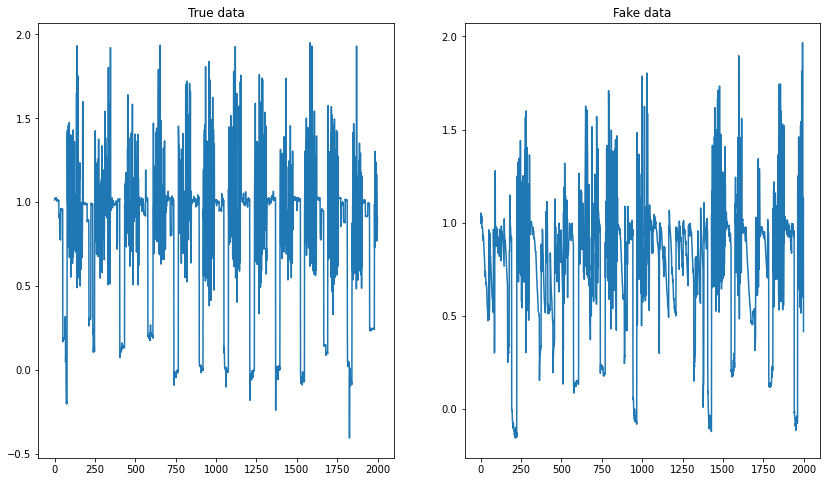

In [9]:
ckpt_path = 'models/mdnmodel.ckpt-999'
seq_len = 2000
model_utils.reset_session_and_model()
true_data = data[0,:2000]
with tf.Session() as sess:
    test_config = model.ModelConfig()
    test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    test_model = model.MDNModel(test_config, True)
    test_model.is_training = False
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, ckpt_path)
    fake_data = test_model.predict(sess, seq_len)
fig, axes = plt.subplots(1,2, figsize=((14,8)))
axes[0].plot(true_data)
axes[0].set_title('True data')
axes[1].plot(fake_data)
axes[1].set_title('Fake data')